In [1]:
import pandas as pd
import random

## Explore train-balanced.csv

In [2]:
# Read in a percentage `p` (0.0 to 1.0) sized sample of the data
p = .01

In [3]:
def read_in_data(file):
    return pd.read_csv(file, 
                       sep='\t', 
                       header=None, 
                       names=['label','comment','author','subreddit','score',
                              'ups','downs','date','created_utc','parent_comment'],
                       usecols=['label','comment','author','subreddit','score',
                              'date','created_utc','parent_comment'],  
                       skiprows=lambda i: i>0 and random.random() > p)    

In [4]:
data_train = read_in_data("../data/train-balanced.csv")
data_train.head()

,label,comment,author,subreddit,score,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didn't say they were sober fans.,Gnux13,nfl,1,2016-10,1477848455,... you have fans that say that?
2,0,Isn't that like illegal?,Fablemaster44,AskReddit,4,2016-11,1479859759,I had a gym teacher in HS who have the class d...
3,0,Came here to say this.,goddamit_iamwasted,india,3,2016-11,1479703208,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,radickulous,canada,0,2016-11,1480361966,Time will tell. Kind of presumptuous with all ...


In [5]:
# view data types and memory usage

def view_df_info(df):
    return df.info(memory_usage='deep', null_counts=True)

view_df_info(data_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10138 entries, 0 to 10137
Data columns (total 8 columns):
label             10138 non-null int64
comment           10137 non-null object
author            10138 non-null object
subreddit         10138 non-null object
score             10138 non-null int64
date              10138 non-null object
created_utc       10138 non-null int64
parent_comment    10138 non-null object
dtypes: int64(3), object(5)
memory usage: 5.1 MB


In [6]:
# create human-readable col from created_utc

def convert_UTC_to_datetime(df):
    return pd.to_datetime(df['created_utc'], unit='s')

data_train['created_datetime'] = convert_UTC_to_datetime(data_train)
data_train.head()

,label,comment,author,subreddit,score,date,created_utc,parent_comment,created_datetime
0,0,NC and NH.,Trumpbart,politics,2,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ...",2016-10-16 23:55:23
1,0,We didn't say they were sober fans.,Gnux13,nfl,1,2016-10,1477848455,... you have fans that say that?,2016-10-30 17:27:35
2,0,Isn't that like illegal?,Fablemaster44,AskReddit,4,2016-11,1479859759,I had a gym teacher in HS who have the class d...,2016-11-23 00:09:19
3,0,Came here to say this.,goddamit_iamwasted,india,3,2016-11,1479703208,Every scene of gunda,2016-11-21 04:40:08
4,0,Canada has changed and the us changed drastica...,radickulous,canada,0,2016-11,1480361966,Time will tell. Kind of presumptuous with all ...,2016-11-28 19:39:26


In [7]:
# replace date, created_utc cols with created_date

def reorder_col_headers(df, cols):
    return df[cols]

data_train = reorder_col_headers(data_train, 
                                 ['label', 'comment', 'author', 'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_train.head()

,label,comment,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didn't say they were sober fans.,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isn't that like illegal?,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this.,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [8]:
train_bal_shape = data_train.shape
train_bal_shape

(10138, 7)

In [9]:
data_train.describe()  # add descrip of categorical data too

,label,score
count,10138.000000,10138.000000
mean,0.504735,6.713948
std,0.500002,42.104429
min,0.000000,-91.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,4.000000
max,1.000000,2906.000000


### Are there any NA values?

In [10]:
def identify_NA_values_in_data(df):
    # Any NAs?
    print('NAs exist in this sample (T/F):', df.isnull().values.any(), '\n')
    # How many?
    print('How many NAs in this sample?', df.isnull().sum().sum(), '\n')  # 53 in entire TRAIN dataset
    # In which columns?
    print('Which cols have NAs in this sample?\n')
    print(df.isnull().any(), '\n')

    # How many of them are sarcasm?
    print('Of these NAs, how many are labeled sarcasm?\n')
    nulls = df[df['comment'].isnull()]  
    print('\tNumber of null comments in sample:', len(nulls))
    nulls_sarc = nulls[nulls['label'] == 1]
    print('\tNumber of null comments in sample that are sarcasm:',len(nulls_sarc))
    if not len(nulls) == 0:
        print('\tRatio of sarcastic null comments to all null comments in sample:', len(nulls_sarc) / len(nulls))
    else:
        print('\tRatio of sarcastic null comments to all null comments in sample: 0 of 0')
        
identify_NA_values_in_data(data_train)

NAs exist in this sample (T/F): True 

How many NAs in this sample? 1 

Which cols have NAs in this sample?

label               False
comment              True
author              False
subreddit           False
score               False
created_datetime    False
parent_comment      False
dtype: bool 

Of these NAs, how many are labeled sarcasm?

	Number of null comments in sample: 1
	Number of null comments in sample that are sarcasm: 1
	Ratio of sarcastic null comments to all null comments in sample: 1.0


### Will these NAs negatively affect our planned analysis?

To consider it from another angle, might a nonresponse be useful as we seek to detect sarcasm? 

1. In the context of the parent_comment, might the empty response be intentional?
 - Consider index 228124. The parent_comment is "I hate "not sure if sarcasm" comments but your...." This means that author previously wrote or indicated "not sure if sarcasm." And in response to "I hate 'not sure if sarcasm'" author responds with an empty string. In the context of a live human conversation, especially a contentious one, a silent stare might be interpreted as anger, aggression, or sarcasm. Thus it seems that an empty response could be not only intentional but pointed and full of meaning.
 - Also, because some of the empty comments were flagged by author as sarcasm, we can be highly confident that the lack of content is intentional in most of these cases. Note that intentionality is less clear in empty comments that are _not_ annotated as sarcasm by author.
1. Will dropping or keeping the NAs affect our analysis?
 - Because there are so few relative to the size of the dataset, dropping the NAs would likely not damage our analysis significantly.
 - However, because they can represent a specific form of sarcasm, we will keep them.
 
**Decision: Keep empty comments. They should not hurt and will likely help our analysis.**

## Explore test-balanced.csv

In [11]:
# data_TEST
data_test = read_in_data("../data/test-balanced.csv")
data_test['created_datetime'] = convert_UTC_to_datetime(data_test)
data_test = reorder_col_headers(data_test, 
                                 ['label', 'comment', 'author', 'subreddit', 'score', 'created_datetime', 'parent_comment'])

print(data_test.shape, '\n')
data_test.head()

(2396, 7) 



,label,comment,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,"Pioli, Casserio, too (if we include personnel ...",ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


In [12]:
# data_TEST
view_df_info(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 7 columns):
label               2396 non-null int64
comment             2396 non-null object
author              2396 non-null object
subreddit           2396 non-null object
score               2396 non-null int64
created_datetime    2396 non-null datetime64[ns]
parent_comment      2396 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.1 MB


In [13]:
# data_TEST
data_test.describe()

,label,score
count,2396.000000,2396.000000
mean,0.495409,5.581386
std,0.500083,19.318008
min,0.000000,-29.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,4.000000
max,1.000000,418.000000


In [14]:
# data_TEST
identify_NA_values_in_data(data_test)

NAs exist in this sample (T/F): False 

How many NAs in this sample? 0 

Which cols have NAs in this sample?

label               False
comment             False
author              False
subreddit           False
score               False
created_datetime    False
parent_comment      False
dtype: bool 

Of these NAs, how many are labeled sarcasm?

	Number of null comments in sample: 0
	Number of null comments in sample that are sarcasm: 0
	Ratio of sarcastic null comments to all null comments in sample: 0 of 0


Note that in the balanced dataset the incidence of sarcasm for empty comments is 0.85, much higher than the expected value of 0.5 for comments in general. (The incidence of sarcasm in the _unbalanced_ data across all comments is < 0.01.)
#### Based on this fact, we _may_ want to keep the nulls.

## Explore test-unbalanced.csv
Too large, can't load.

# But . . . 

## the empty strings are causing problems in operations below . . .

such as when we try to remove punctuation from an empty string, etc.

# So we will DROP the nulls.
They comprise only 0.005% (0.00005) of the data, so will not skew the data by their absence.

In [15]:
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

# KAGGLE 

Based on tutorial at https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

**Imports**

In [16]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [17]:
data_train.columns

Index(['label', 'comment', 'author', 'subreddit', 'score', 'created_datetime',
       'parent_comment'],
      dtype='object')

In [18]:
# extract the number of observations for each class
len_0 = data_train[data_train['label'] == 0].shape[0]
len_1 = data_train[data_train['label'] == 1].shape[0]

### Plot the number of observations for each class (sarcastic and nonsarcastic)

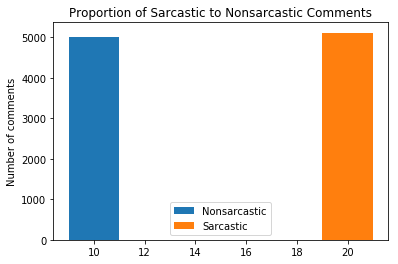

In [19]:
# to visualize the ratio 
plt.bar(10, len_0, 2, label = "Nonsarcastic")
plt.bar(20, len_1, 2, label = "Sarcastic")
plt.legend()
plt.ylabel('Number of comments')
plt.title('Proportion of Sarcastic to Nonsarcastic Comments')
plt.show()

## Feature Engineering

Create function to remove punctuation

In [20]:
def remove_punc(comment):
    '''This function removes punctuation from the text.'''
    
    import string
    
    # replace punctuation with '' (no space)
    translator = str.maketrans('', '', string.punctuation)
    
    # return the text stripped of punctuation marks
    return comment.translate(translator)

Apply remove_punc function to each string in our data

In [21]:
data_train['comment'] = data_train['comment'].apply(remove_punc)

print('TRAIN DATA\n')
data_train.head()

TRAIN DATA



,label,comment,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [22]:
data_test['comment'] = data_test['comment'].apply(remove_punc)

print('TEST DATA\n')
data_test.head()

TEST DATA



,label,comment,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


## Deal with stopwords and letter casing

In [23]:
# load stopwords from NLTK
sw = stopwords.words('english')
# view stop words
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [24]:
def remove_stopwords_and_lowercase(comment):
    '''This function lowercases words and then remove stopwords.'''
    
    comment = \
    [word.lower() for word in comment.split() if word.lower() not in sw]
    return ' '.join(comment)

In [25]:
# Apply the function to each comment
data_train['comment_lc_stopped'] = data_train['comment'].apply(remove_stopwords_and_lowercase)
data_train = reorder_col_headers(data_train, 
                                 ['label', 'comment', 'comment_lc_stopped', 'author', 
                                  'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_train.head()

,label,comment,comment_lc_stopped,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,nc nh,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,didnt say sober fans,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,isnt like illegal,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,came say,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,canada changed us changed drastically bush obama,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [26]:
data_test['comment_lc_stopped'] = data_test['comment'].apply(remove_stopwords_and_lowercase)
data_test = reorder_col_headers(data_test, 
                                 ['label', 'comment', 'comment_lc_stopped', 'author', 
                                  'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_test.head()

,label,comment,comment_lc_stopped,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,actually supporters sane people saw media doin...,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,blatant one flusha mirage ninja defuse,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,pioli casserio include personnel people,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,san dimas high school football club,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,creative juices flowing,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


### View most frequent words: count vectorizer, pre stemming

In [27]:
def get_top_n_words(corpus, vectorizer, n=None):
    '''This function returns the top n words in a vocabulary according to occurrence 
    in a text corpus. 
    Inputs:
    - corpus must be a list-like collection of strings (such as a str col in a df)
    - n, if passed, is the number of top frequency words to return
    - vectorizer_type, e.g., CountVectorizer, TfidfVectorizer
    '''
    
    # instantiate vectorizer of type 'vectorizer'
    vectorizer = vectorizer
    
    '''
    count_vectorizer:
     CountVectorizer(analyzer='word', binary=False, decode_error='strict',
            dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
            lowercase=True, max_df=1.0, max_features=None, min_df=1,
            ngram_range=(1, 1), preprocessor=None, stop_words=None,
            strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
            tokenizer=None, vocabulary=None)''' 
    
    # fit count_vectorizer model to data in-place
    vectorizer.fit(corpus)
    
    # collect vocab used in vectorizer into a dictionary
    dictionary = vectorizer.vocabulary_.items()
    
    '''
    dict_items([('nc', 63990), ('nh', 64804), ('know', 52397), ('west', 102263), ('team', 92198), ('play', 72286), 
    ('east', 30780), ('right', 79228), ('underdog', 97682), ('earlier', 30710), ('today', 94477), 
    . . .
    ('thousandfold', 93661), ('awpwhor', 11759), ('barackobama', 12773), ('hollywoodalway', 45032), 
    ('aghaghagh', 7359), ('afroarab', 7218)])
    '''
    
    # encode the corpus: create a vector (AKA a bag of words) 
    # using the transform method of the fitted vectorizer on the corpus
    vector = vectorizer.transform(corpus) 
    
    '''
    vector (bag of words):
      (0, 32328)      1     # WHAT DO THESE TUPLES AND VALUES REPRESENT???
      (0, 32687)      1
      (1, 15550)      1
      (1, 26748)      1
      . . . 
      (101022, 11180) 1
      (101022, 28492) 1
      (101022, 29176) 1
      (101022, 35734) 1'''
    
    # summarize encoded vector  (bag of words)
    print('vector (bag of words) shape:', vector.shape)
    print('vector (bag of words) type: ', type(vector))
    
    sum_words = vector.sum(axis=0)
    
    '''
    sum_words:
     [[6 7 2 ... 2 1 1]]'''     # HOW TO INTERPRET THIS SUM_WORDS LIST???
    
    # create a word-count Series called 'word_freq' sorted in descending order
    # word_freq is a list of tuples: (word in the vectorizer.vocabulary_, word count)
    word_freq = [(word, sum_words[0, idx]) for word, idx in dictionary]  # dictionary = vectorizer.vocabulary_.items()
    
    '''
    word_freq:
     [('nc', 17), ('nh', 4), ('know', 2586), ('west', 82), ('teams', 175), ('play', 832), ('east', 88), 
     ('right', 2353), ('could', 1478), ('use', 1095), ('one', 3274), ('tools', 23), ('trick', 56), 
     ('treating', 13), ('general', 112), ('weird', 157), ('would', 3455), ('love', 924), ('see', 1692), 
     ('lolla', 1), ('damn', 517), . . . ('craftsmanship', 1), ('25mph', 1), ('wandering', 1), 
     ('hollywoodalways', 1)]'''
    
    # sort word_freq counts with vocab as index
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    
    '''
    sorted word_freq:
     [('like', 5550),
      ('dont', 4295),
      ('yeah', 4102),
      ('people', 3579),
      ('get', 3533)]'''
    
    return word_freq[:n]

In [28]:
# TRAIN

# specify corpus, n number of top words to return, and vectorizer type

top_vocab_train_pre_stemming = get_top_n_words(corpus=data_train['comment_lc_stopped'], 
                                               vectorizer=CountVectorizer(), n=5)
top_vocab_train_pre_stemming

vector (bag of words) shape: (10137, 14103)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 551), ('dont', 451), ('yeah', 406), ('people', 366), ('would', 358)]

In [29]:
# TEST

# specify corpus, n number of top words to return, and vectorizer type

top_vocab_test_pre_stemming = get_top_n_words(corpus=data_test['comment_lc_stopped'], 
                                               vectorizer=CountVectorizer(), n=5)
top_vocab_test_pre_stemming

vector (bag of words) shape: (2396, 5517)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 135), ('dont', 97), ('well', 94), ('people', 90), ('get', 83)]

In [30]:
# Plot most freqent words

     word  count
0    like    551
1    dont    451
2    yeah    406
3  people    366
4   would    358



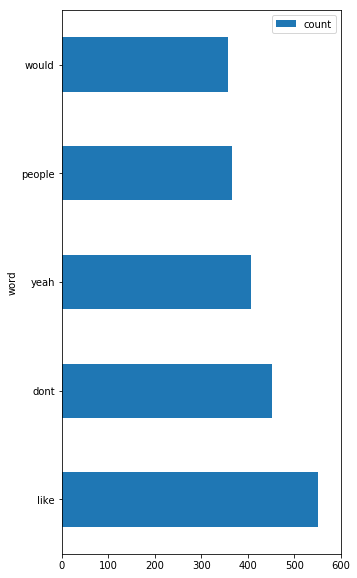

In [31]:
# TRAIN
top_vocab_train_pre_stemming_df = pd.DataFrame(top_vocab_train_pre_stemming, columns=['word','count']) 
print(top_vocab_train_pre_stemming_df)
print()

top_vocab_train_pre_stemming_df.set_index('word', inplace=True)
top_vocab_train_pre_stemming_df.plot(kind = 'barh', figsize=(5,10), xlim= (0, 6000 * (100 * p / 10)))  

     word  count
0    like    135
1    dont     97
2    well     94
3  people     90
4     get     83



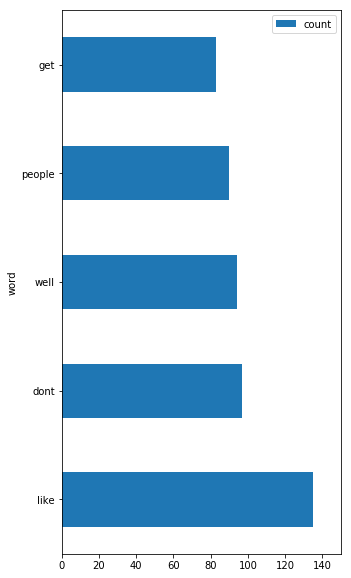

In [32]:
# TEST 
top_vocab_test_pre_stemming_df = pd.DataFrame(top_vocab_test_pre_stemming, columns=['word','count']) 
print(top_vocab_test_pre_stemming_df)
print()

top_vocab_test_pre_stemming_df.set_index('word', inplace=True)
top_vocab_test_pre_stemming_df.plot(kind = 'barh', figsize=(5,10), xlim= (0, 1500 * (100 * p / 10))) 

### Stem all words

Create a function to stem words

In [33]:
stemmer = SnowballStemmer('english')

In [34]:
# test the stemmer
print(stemmer.stem("running"))

run


In [35]:
def stem_each_word(text):
    '''This function stems each word in `text`'''
    
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

In [36]:
# test the stem_each_word(text) function
stem_each_word('late later laters lately got get gets did done do does running runs ran')

'late later later late got get get did done do doe run run ran'

In [37]:
# apply stem_each_word function to each TRAIN and TEST comment

# TRAIN
data_train['comment_stemmed'] = data_train['comment_lc_stopped'].apply(stem_each_word)
data_train = reorder_col_headers(data_train, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed', 'author', 
                                  'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_train.head()

,label,comment,comment_lc_stopped,comment_stemmed,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,nc nh,nc nh,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,didnt say sober fans,didnt say sober fan,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,isnt like illegal,isnt like illeg,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,came say,came say,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,canada changed us changed drastically bush obama,canada chang us chang drastic bush obama,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [38]:
# TEST
data_test['comment_stemmed'] = data_test['comment_lc_stopped'].apply(stem_each_word)
data_test = reorder_col_headers(data_test, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed', 'author', 
                                  'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_test.head()

,label,comment,comment_lc_stopped,comment_stemmed,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,actually supporters sane people saw media doin...,actual support sane peopl saw media doingespec...,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,blatant one flusha mirage ninja defuse,blatant one flusha mirag ninja defus,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,pioli casserio include personnel people,pioli casserio includ personnel peopl,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,san dimas high school football club,san dima high school footbal club,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,creative juices flowing,creativ juic flow,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


# Lemmatize

In [39]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# test lemmatizer
print('rocks :', lemmatizer.lemmatize('rocks'))

rocks : rock


In [40]:
def lemmatize_each_word(text):
    '''This function lemmatizes each word, e.g., 
    - Remove the final "s" or "es" to singularize plurals and change person of some verbs
      (gets --> get,
      passes --> pass, 
      BUT not always as expected: 
      does --> doe (a deer, a female deer), 
      capitalizes --> captializes)
    '''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(text)

In [41]:
# test the lemmatize_each_word(text) function
lemmatize_each_word('getting got get gets did done donned farmed farms capitalize capitalized capitalizes do does running runs \
                    ran passes a string of many words and terms and documentation and information documents')

'getting got get get did done donned farmed farm capitalize capitalized capitalizes do doe running run ran pass a string of many word and term and documentation and information document'

In [42]:
# apply lemmatize_each_word(text) function to each TRAIN and TEST comment

# TRAIN
data_train['comment_stemmed_lemmed'] = data_train['comment_stemmed'].apply(lemmatize_each_word)
data_train = reorder_col_headers(data_train, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed', 'comment_stemmed_lemmed',
                                  'author', 'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_train.head()

,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,nc nh,nc nh,nc nh,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,didnt say sober fans,didnt say sober fan,didnt say sober fan,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,isnt like illegal,isnt like illeg,isnt like illeg,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,came say,came say,came say,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,canada changed us changed drastically bush obama,canada chang us chang drastic bush obama,canada chang u chang drastic bush obama,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [43]:
# TEST

data_test['comment_stemmed_lemmed'] = data_test['comment_stemmed'].apply(lemmatize_each_word)
data_test = reorder_col_headers(data_test, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed', 'comment_stemmed_lemmed',
                                  'author', 'subreddit', 'score', 'created_datetime', 'parent_comment'])
data_test.head()

,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,actually supporters sane people saw media doin...,actual support sane peopl saw media doingespec...,actual support sane peopl saw medium doingespe...,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,blatant one flusha mirage ninja defuse,blatant one flusha mirag ninja defus,blatant one flusha mirag ninja defus,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,pioli casserio include personnel people,pioli casserio includ personnel peopl,pioli casserio includ personnel peopl,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,san dimas high school football club,san dima high school footbal club,san dima high school footbal club,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,creative juices flowing,creativ juic flow,creativ juic flow,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


### View most frequent words: TFIDF vectorizer, post stemming/lemmatizing

In [44]:
# def fit_transform_TFIDF_to_col_of_text_data(col):
#     '''
#     This function takes as input a column of text data.
#     It fits the TFIDF vectorizer to the data, producing a dictionary in the process.
#     It then encodes the text using the vectorizer transform method. BUT HOW IS THIS VECTOR USED IN LATER CODE???
#     It returns the dictionary object.
#     '''

#     # instantiate tfidf vectorizer
#     tfidf_vectorizer = TfidfVectorizer()

#     # fit tfidf_vectorizer model to data
#     tfidf_vectorizer.fit(col)

#     # collect vocab used in vectorizer into a dictionary
#     dictionary = tfidf_vectorizer.vocabulary_.items()
# #     print(dictionary)
#     '''
#     dict_items([('nc', 63990), ('nh', 64804), ('know', 52397), ('west', 102263), ('team', 92198), ('play', 72286), 
#     ('east', 30780), ('right', 79228), ('underdog', 97682), ('earlier', 30710), ('today', 94477), . . .
#     ('thousandfold', 93661), ('awpwhor', 11759), ('barackobama', 12773), ('hollywoodalway', 45032), 
#     ('aghaghagh', 7359), ('afroarab', 7218)])
#     '''

#     # encode the text. What is named "vector" here was called "bag-of-words" above.
#     vector = tfidf_vectorizer.transform(col)
#                                     # HOW IS THIS VECTOR USED BELOW??? I DON'T SEE IT IN THE CODE.

#     # summarize encoded vector
#     print(vector.shape)
#     print(type(vector))
#     '''
#     (505578, 106515)
#     <class 'scipy.sparse.csr.csr_matrix'>
#     '''
    
# #     print(vector.toarray())
#     '''
#     MEMORY ERROR ON p = .1 of data  (EVERYTHING ELSE ABOVE WORKS ON **ALL** THE DATA)
#     '''    
    
#     '''
#     On p = 0.01 of data:
    
#     [[0. 0. 0. ... 0. 0. 0.]
#      [0. 0. 0. ... 0. 0. 0.]
#      [0. 0. 0. ... 0. 0. 0.]
#      ...
#      [0. 0. 0. ... 0. 0. 0.]
#      [0. 0. 0. ... 0. 0. 0.]
#      [0. 0. 0. ... 0. 0. 0.]]
#     '''
    
#     return dictionary

In [45]:
# def tfidf_word_count(dictionary):
#     '''
#     This function takes the TFIDF dictionary as input and returns
#     a TFIDF word-count Series sorted in descending order.
#     '''
    
#     # Create sorted df of counts with vocab as index

#     # store the vocab and counts in lists
#     vocab = []
#     count = []

#     for k,v in dictionary:
#         vocab.append(k)
#         count.append(v)

#     # return the count in a Series indexed on vocab
#     return pd.Series(count, index=vocab).sort_values(ascending=False)

In [46]:
# # TRAIN data
# train_TFIDF_dictionary = fit_transform_TFIDF_to_col_of_text_data(data_train['comment_stemmed_lemmed'])

In [47]:
# train_vocab_post_stemming_lemming = tfidf_word_count(train_TFIDF_dictionary)

In [48]:
# # TEST data
# test_TFIDF_dictionary = fit_transform_TFIDF_to_col_of_text_data(data_test['comment_stemmed_lemmed'])

In [49]:
# test_vocab_post_stemming_lemming = tfidf_word_count(test_TFIDF_dictionary)

In [50]:
# TRAIN

# specify corpus, n number of top words to return, and vectorizer type

top_vocab_train_post_stemming_lemming = get_top_n_words(corpus=data_train['comment_stemmed_lemmed'], 
                                                        vectorizer=TfidfVectorizer(), n=5)
top_vocab_train_post_stemming_lemming

vector (bag of words) shape: (10137, 10713)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 133.46748986804732),
 ('get', 112.0801576510653),
 ('dont', 111.35726675887145),
 ('yeah', 105.74605103774961),
 ('peopl', 92.29550109490917)]

In [51]:
# TEST

# specify corpus, n number of top words to return, and vectorizer type

top_vocab_test_post_stemming_lemming = get_top_n_words(corpus=data_test['comment_stemmed_lemmed'], 
                                                       vectorizer=TfidfVectorizer(), n=5)
top_vocab_test_post_stemming_lemming

vector (bag of words) shape: (2396, 4478)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 34.46188908573043),
 ('get', 25.640451785973173),
 ('dont', 25.536221365074315),
 ('well', 24.74520263130464),
 ('yeah', 24.344823871190492)]

In [52]:
# Plot most freqent words

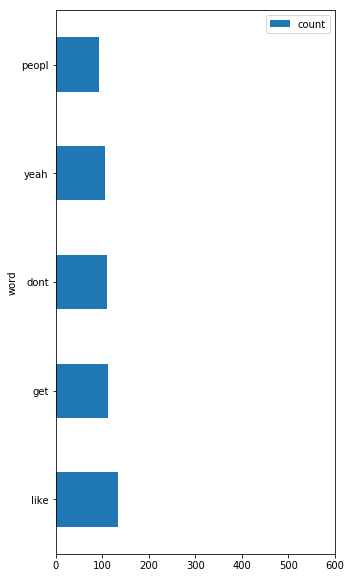

In [53]:
# TRAIN
top_vocab_train_post_stemming_lemming_df = pd.DataFrame(top_vocab_train_post_stemming_lemming, columns=['word','count']) 
top_vocab_train_post_stemming_lemming_df

top_vocab_train_post_stemming_lemming_df.set_index('word', inplace=True)

top_vocab_train_post_stemming_lemming_df.plot(kind = 'barh', figsize=(5,10), xlim= (0, 6000 * (100 * p / 10)))  

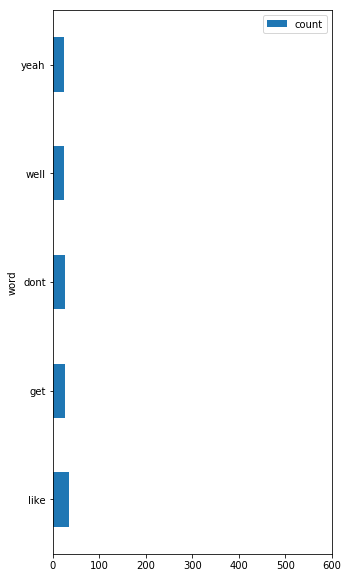

In [54]:
# TEST 
top_vocab_test_post_stemming_lemming_df = pd.DataFrame(top_vocab_test_post_stemming_lemming, columns=['word','count']) 
top_vocab_test_post_stemming_lemming_df

top_vocab_test_post_stemming_lemming_df.set_index('word', inplace=True)

top_vocab_test_post_stemming_lemming_df.plot(kind = 'barh', figsize=(5,10), xlim= (0, 6000 * (100 * p / 10)))  

#### Create a function to return the length of a comment

In [55]:
def comment_len(comment):
    '''This function returns the length of comment.'''
    
    return len(comment)

In [56]:
# apply comment_len function to each comment

#TRAIN
data_train['c_len'] = data_train['comment'].apply(comment_len)
data_train['c_s_l_len'] = data_train['comment_stemmed_lemmed'].apply(comment_len)
data_train = reorder_col_headers(data_train, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed',
                                  'comment_stemmed_lemmed', 'c_len', 'c_s_l_len', 'author', 'subreddit', 'score',
                                  'created_datetime', 'parent_comment'])
data_train.head()

,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,nc nh,nc nh,nc nh,9,5,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,didnt say sober fans,didnt say sober fan,didnt say sober fan,33,19,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,isnt like illegal,isnt like illeg,isnt like illeg,22,15,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,came say,came say,came say,21,8,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,canada changed us changed drastically bush obama,canada chang us chang drastic bush obama,canada chang u chang drastic bush obama,68,39,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [57]:
# TEST
data_test['c_len'] = data_test['comment'].apply(comment_len)
data_test['c_s_l_len'] = data_test['comment_stemmed_lemmed'].apply(comment_len)
data_test = reorder_col_headers(data_test, 
                                 ['label', 'comment', 'comment_lc_stopped', 'comment_stemmed',
                                  'comment_stemmed_lemmed', 'c_len', 'c_s_l_len', 'author', 'subreddit', 'score',
                                  'created_datetime', 'parent_comment'])
data_test.head()

,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,actually supporters sane people saw media doin...,actual support sane peopl saw media doingespec...,actual support sane peopl saw medium doingespe...,99,57,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,blatant one flusha mirage ninja defuse,blatant one flusha mirag ninja defus,blatant one flusha mirag ninja defus,62,36,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,pioli casserio include personnel people,pioli casserio includ personnel peopl,pioli casserio includ personnel peopl,49,37,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,san dimas high school football club,san dima high school footbal club,san dima high school footbal club,39,33,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,creative juices flowing,creativ juic flow,creativ juic flow,23,17,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


### Extract comments of both classes (sarc and nonsarc)

In [58]:
# extract the observations for each class
NONsarc_data_train = data_train[data_train['label'] == 0]
SARC_data_train = data_train[data_train['label'] == 1]

NONsarc_data_test = data_test[data_test['label'] == 0]
SARC_data_test = data_test[data_test['label'] == 1]

In [59]:

# NONsarc_train_clen_mean = NONsarc_data_train.describe().loc[['mean'], ['c_len']]  



    


### Print 'describe()' of SARC and NONsarc comments

In [60]:
print('NONsarc_data_train.describe():\n', NONsarc_data_train.describe())
NONsarc_data_train.head()

NONsarc_data_train.describe():
         label        c_len    c_s_l_len        score
count  5021.0  5021.000000  5021.000000  5021.000000
mean      0.0    53.272057    31.989444     7.398526
std       0.0    45.496452    27.409970    54.095945
min       0.0     0.000000     0.000000   -91.000000
25%       0.0    22.000000    14.000000     1.000000
50%       0.0    41.000000    25.000000     2.000000
75%       0.0    71.000000    42.000000     4.000000
max       0.0   538.000000   341.000000  2906.000000


,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
0,0,NC and NH,nc nh,nc nh,nc nh,9,5,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,We didnt say they were sober fans,didnt say sober fans,didnt say sober fan,didnt say sober fan,33,19,Gnux13,nfl,1,2016-10-30 17:27:35,... you have fans that say that?
2,0,Isnt that like illegal,isnt like illegal,isnt like illeg,isnt like illeg,22,15,Fablemaster44,AskReddit,4,2016-11-23 00:09:19,I had a gym teacher in HS who have the class d...
3,0,Came here to say this,came say,came say,came say,21,8,goddamit_iamwasted,india,3,2016-11-21 04:40:08,Every scene of gunda
4,0,Canada has changed and the us changed drastica...,canada changed us changed drastically bush obama,canada chang us chang drastic bush obama,canada chang u chang drastic bush obama,68,39,radickulous,canada,0,2016-11-28 19:39:26,Time will tell. Kind of presumptuous with all ...


In [61]:
print('SARC_data_train.describe():\n', SARC_data_train.describe())
SARC_data_train.head()

SARC_data_train.describe():
         label        c_len    c_s_l_len        score
count  5116.0  5116.000000  5116.000000  5116.000000
mean      1.0    54.214621    32.756841     6.043198
std       0.0    35.287265    21.377094    25.306062
min       1.0     2.000000     0.000000   -85.000000
25%       1.0    28.000000    17.000000     1.000000
50%       1.0    47.000000    28.000000     2.000000
75%       1.0    72.000000    43.000000     5.000000
max       1.0   373.000000   173.000000   856.000000


,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
15,1,Its the Russians,russians,russian,russian,16,7,DwarvenPirate,politics,1,2016-11-06 06:19:06,The right-wing has congealed around a hysteric...
23,1,Just keeping an eye out for voter fraud,keeping eye voter fraud,keep eye voter fraud,keep eye voter fraud,39,20,Broadsky,the_meltdown,4,2016-11-08 18:59:32,When you spent your whole life trashing women ...
31,1,rigged,rigged,rig,rig,6,3,DumpsterDon,politics,-2,2016-11-11 23:23:32,"checkmate, atheists Also, Democrats don't ""run..."
36,1,Oh wow its looks like much of less inhabited p...,oh wow looks like much less inhabited parts us...,oh wow look like much less inhabit part us can...,oh wow look like much le inhabit part u canada...,79,51,blauschein,travel,2,2016-11-21 15:15:57,My first time in Canada. As a Florida girl tur...
38,1,And steak was originally food for poor people ...,steak originally food poor people marinated ch...,steak origin food poor peopl marin chamber pot...,steak origin food poor peopl marin chamber pot...,206,100,LoyalServantOfBRD,SubredditDrama,7,2016-11-17 17:13:27,"Pizza, by origin, was a way for bakers to clea..."


In [62]:
print('NONsarc_data_test.describe():\n', NONsarc_data_test.describe())
NONsarc_data_test.head()

NONsarc_data_test.describe():
         label       c_len    c_s_l_len        score
count  1209.0  1209.00000  1209.000000  1209.000000
mean      0.0    54.15550    32.206782     5.258065
std       0.0    45.38039    26.117163    15.722329
min       0.0     0.00000     0.000000   -23.000000
25%       0.0    23.00000    14.000000     1.000000
50%       0.0    43.00000    26.000000     2.000000
75%       0.0    71.00000    43.000000     4.000000
max       0.0   480.00000   279.000000   234.000000


,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
0,0,Actually most of her supporters and sane peopl...,actually supporters sane people saw media doin...,actual support sane peopl saw media doingespec...,actual support sane peopl saw medium doingespe...,99,57,Quinnjester,politics,3,2016-09-11 04:53:25,Hillary's Surrogotes Told to Blame Media for '...
1,0,Most blatant one for me was flusha on mirage t...,blatant one flusha mirage ninja defuse,blatant one flusha mirag ninja defus,blatant one flusha mirag ninja defus,62,36,slaughtrr12,VACsucks,4,2016-12-31 16:37:31,What is the craziest aimlock you've seen? Mine...
2,0,Pioli Casserio too if we include personnel people,pioli casserio include personnel people,pioli casserio includ personnel peopl,pioli casserio includ personnel peopl,49,37,ElliotRosewater1,nfl,3,2016-12-12 18:37:57,"Except the people who hired Saban, Ferentz, Cr..."
3,0,the san dimas high school football club,san dimas high school football club,san dima high school footbal club,san dima high school footbal club,39,33,a_hot_leaf_juice,nfl,7,2016-12-13 03:03:00,Who is going to win the Super Bowl?
4,0,Creative juices flowing,creative juices flowing,creativ juic flow,creativ juic flow,23,17,black_brotha,videos,1,2016-12-19 16:44:22,Guy Plays Miles Davis and LCD Soundsystem Song...


In [63]:
print('SARC_data_test.describe():\n', SARC_data_test.describe())
SARC_data_test.head()

SARC_data_test.describe():
         label        c_len    c_s_l_len        score
count  1187.0  1187.000000  1187.000000  1187.000000
mean      1.0    53.657119    32.315080     5.910699
std       0.0    36.423167    21.443879    22.396785
min       1.0     3.000000     0.000000   -29.000000
25%       1.0    29.000000    17.000000     1.000000
50%       1.0    45.000000    28.000000     2.000000
75%       1.0    71.000000    42.500000     4.000000
max       1.0   276.000000   177.000000   418.000000


,label,comment,comment_lc_stopped,comment_stemmed,comment_stemmed_lemmed,c_len,c_s_l_len,author,subreddit,score,created_datetime,parent_comment
6,1,thank you NY for giving us Trump,thank ny giving us trump,thank ny give us trump,thank ny give u trump,32,21,thomasandgerald,politics,29,2016-11-08 18:17:45,Dammit NC.
9,1,Are you really laughing,really laughing,realli laugh,realli laugh,23,12,oobspahn,RocketLeagueExchange,0,2016-11-12 14:25:06,"Not mad at all, I'm just talking to you lol"
14,1,If theres anything Ive learned from working wi...,theres anything ive learned working databases ...,there anyth ive learn work databas chang histo...,there anyth ive learn work databas chang histo...,122,75,Exodus2011,announcements,0,2016-12-06 21:10:11,"Wow, don't like the present, so let's change t..."
15,1,Designers who know their trade,designers know trade,design know trade,design know trade,30,17,andrey_shipilov,Design,-6,2016-12-15 00:59:29,"What is supposed to be this ""crop"" icon?"
16,1,Well I guess piracy makes more sense than list...,well guess piracy makes sense listening youtube,well guess piraci make sens listen youtub,well guess piraci make sen listen youtub,62,40,G0sick,anime,0,2016-09-02 03:47:24,Quite a bit of people solely download music by...


### What is relationship of text length to SARC or NONsarc?

In [64]:
# TRAIN
NONsarc_train_c_len_mean = NONsarc_data_train.describe().loc['mean', 'c_len'].astype(np.float64)  
NONsarc_train_c_s_l_len_mean = NONsarc_data_train.describe().loc['mean', 'c_s_l_len'].astype(np.float64)

SARC_train_c_len_mean = SARC_data_train.describe().loc['mean', 'c_len'].astype(np.float64)
SARC_train_c_s_l_len_mean = SARC_data_train.describe().loc['mean', 'c_s_l_len'].astype(np.float64)

print('TRAIN data stats\n')
print('Original comment avg length (SARC):   ', SARC_train_c_len_mean)
print('Original comment avg length (NONsarc):', NONsarc_train_c_len_mean)

print(type(NONsarc_train_c_len_mean))

if SARC_train_c_len_mean > NONsarc_train_c_len_mean:
    print('\tSARC comments (unprocessed) are longer than NONsarc comments by', 
          SARC_train_c_len_mean / NONsarc_train_c_len_mean)
else:
    print('\tNONsarc comments (unprocessed) are longer than SARC comments by', 
          NONsarc_train_c_len_mean / SARC_train_c_len_mean)

print('Processed comment avg length (SARC):   ', SARC_train_c_s_l_len_mean)
print('Processed comment avg length (NONsarc):', NONsarc_train_c_s_l_len_mean)

if SARC_train_c_s_l_len_mean > NONsarc_train_c_s_l_len_mean:
    print('\tSARC comments (processed) are longer than NONsarc comments by', 
          SARC_train_c_s_l_len_mean / NONsarc_train_c_s_l_len_mean)
else:
    print('\tNONsarc comments (processed) are longer than SARC comments by', 
          NONsarc_train_c_s_l_len_mean / SARC_train_c_s_l_len_mean)

TRAIN data stats

Original comment avg length (SARC):    54.21462079749804
Original comment avg length (NONsarc): 53.27205735909182
<class 'numpy.float64'>
	SARC comments (unprocessed) are longer than NONsarc comments by 1.0176933928429435
Processed comment avg length (SARC):    32.756841282251756
Processed comment avg length (NONsarc): 31.989444333798048
	SARC comments (processed) are longer than NONsarc comments by 1.0239890677826786


In [65]:
# TEST
NONsarc_test_c_len_mean = NONsarc_data_test.describe().loc['mean', 'c_len'].astype(np.float64)  
NONsarc_test_c_s_l_len_mean = NONsarc_data_test.describe().loc['mean', 'c_s_l_len'].astype(np.float64)

SARC_test_c_len_mean = SARC_data_test.describe().loc['mean', 'c_len'].astype(np.float64)
SARC_test_c_s_l_len_mean = SARC_data_test.describe().loc['mean', 'c_s_l_len'].astype(np.float64)

print('TEST data stats\n')
print('Original comment avg length (SARC):   ', SARC_test_c_len_mean)
print('Original comment avg length (NONsarc):', NONsarc_test_c_len_mean)

if SARC_test_c_len_mean > NONsarc_test_c_len_mean:
    print('\tSARC comments (unprocessed) are longer than NONsarc comments by', 
          SARC_test_c_len_mean / NONsarc_test_c_len_mean)
else:
    print('\tNONsarc comments (unprocessed) are longer than SARC comments by', 
          NONsarc_test_c_len_mean / SARC_test_c_len_mean)

print('Processed comment avg length (SARC):   ', SARC_test_c_s_l_len_mean)
print('Processed comment avg length (NONsarc):', NONsarc_test_c_s_l_len_mean)

if SARC_test_c_s_l_len_mean > NONsarc_test_c_s_l_len_mean:
    print('\tSARC comments (processed) are longer than NONsarc comments by', 
          SARC_test_c_s_l_len_mean / NONsarc_test_c_s_l_len_mean)
else:
    print('\tNONsarc comments (processed) are longer than SARC comments by', 
          NONsarc_test_c_s_l_len_mean / SARC_test_c_s_l_len_mean)

TEST data stats

Original comment avg length (SARC):    53.65711878685762
Original comment avg length (NONsarc): 54.15550041356493
	NONsarc comments (unprocessed) are longer than SARC comments by 1.0092882666452336
Processed comment avg length (SARC):    32.3150800336984
Processed comment avg length (NONsarc): 32.20678246484698
	SARC comments (processed) are longer than NONsarc comments by 1.0033625702589082


**Not much difference**

In [66]:
# # TRAIN

# matplotlib.rcParams['figure.figzize'] = (12.0, 6.0)
# bins = 500
# plt.hist(SARC_data_train['comment_length'], alpha = 0.6, bins=bins, label='sarcastic')
# plt.hist(NONsarc_data_train['comment_length'], alpha = 0.6, bins=bins, label='nonsarcastic')

# plt.title('Text Length to SARC or NONsarc: TRAIN data')
# plt.xlabel('Comment length')
# plt.ylabel('NUMBERS???')
# plt.legend(loc='upper right')
# plt.xlim(0,300) # ????
# plt.grid()
# plt.show()

# """
# ---------------------------------------------------------------------------
# KeyError                                  Traceback (most recent call last)
# ~\Anaconda3\lib\site-packages\matplotlib\__init__.py in __setitem__(self, key, val)
#     860             try:
# --> 861                 cval = self.validate[key](val)
#     862             except ValueError as ve:

# KeyError: 'figure.figzize'

# During handling of the above exception, another exception occurred:

# KeyError                                  Traceback (most recent call last)
# <ipython-input-60-1dd9c4795c01> in <module>
#       1 # TRAIN
#       2 
# ----> 3 matplotlib.rcParams['figure.figzize'] = (12.0, 6.0)
#       4 bins = 500
#       5 plt.hist(SARC_data_train['comment_length'], alpha = 0.6, bins=bins, label='sarcastic')

# ~\Anaconda3\lib\site-packages\matplotlib\__init__.py in __setitem__(self, key, val)
#     866             raise KeyError(
#     867                 '%s is not a valid rc parameter. See rcParams.keys() for a '
# --> 868                 'list of valid parameters.' % (key,))
#     869 
#     870     def __getitem__(self, key):

# KeyError: 'figure.figzize is not a valid rc parameter. See rcParams.keys() for a list of valid parameters.'"""

In [67]:
# # TEST

# matplotlib.rcParams['figure.figzize'] = (12.0, 6.0)
# bins = 500
# plt.hist(SARC_data_test['comment_length'], alpha = 0.6, bins=bins, label='sarcastic')
# plt.hist(NONsarc_data_test['comment_length'], alpha = 0.6, bins=bins, label='nonsarcastic')

# plt.title('Text Length to SARC or NONsarc: TEST data')
# plt.xlabel('Comment length')
# plt.ylabel('NUMBERS???')
# plt.legend(loc='upper right')
# plt.xlim(0,300) # ????
# plt.grid()
# plt.show()

### Top words in SARC and NONsarc comments

In [68]:
# SARCasm 

# TRAIN

# specify corpus, n number of top words to return, and vectorizer type

top_SARC_vocab_train_processed = get_top_n_words(corpus=SARC_data_train['comment_stemmed_lemmed'], 
                                                 vectorizer=TfidfVectorizer(), n=5)
top_SARC_vocab_train_processed

vector (bag of words) shape: (5116, 6843)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('yeah', 77.66059381330676),
 ('like', 71.80271044612596),
 ('dont', 61.52265990719078),
 ('forgot', 59.36584670237471),
 ('get', 58.81254233950638)]

In [69]:
# NONsarc

# TRAIN
top_NONsarc_vocab_train_processed = get_top_n_words(corpus=NONsarc_data_train['comment_stemmed_lemmed'], 
                                                 vectorizer=TfidfVectorizer(), n=5)
top_NONsarc_vocab_train_processed

vector (bag of words) shape: (5021, 7223)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 65.06101558558635),
 ('get', 55.883760012730185),
 ('dont', 52.36702078664647),
 ('one', 46.03215365719033),
 ('would', 45.30724638070534)]

In [70]:
# SARCasm 

# TEST
top_SARC_vocab_test_processed = get_top_n_words(corpus=SARC_data_test['comment_stemmed_lemmed'], 
                                                 vectorizer=TfidfVectorizer(), n=5)
top_SARC_vocab_test_processed

vector (bag of words) shape: (1187, 2753)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 20.37361290277111),
 ('yeah', 16.11017581295016),
 ('well', 14.724553357155724),
 ('forgot', 14.417208008444861),
 ('dont', 13.5669785146663)]

In [71]:
# NONsarc

# TEST
top_NONsarc_vocab_test_processed = get_top_n_words(corpus=NONsarc_data_test['comment_stemmed_lemmed'], 
                                                 vectorizer=TfidfVectorizer(), n=5)
top_NONsarc_vocab_test_processed

vector (bag of words) shape: (1209, 2919)
vector (bag of words) type:  <class 'scipy.sparse.csr.csr_matrix'>


[('like', 15.524450376044584),
 ('get', 14.320214718190288),
 ('dont', 13.003469241836642),
 ('go', 12.430684251019532),
 ('good', 12.364627278774403)]

## Is `top_vocab` a good feature to distinguish sarcasm from nonsarcasm?
Are the words in each list distinct and are the word counts large?

If the answer is YES, we will extract the TFIDF representation and train our prediction model on it.

### Extract the TF-IDF representation of the comment data

In [72]:
# TRAIN

# instantiate, fit, transform
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data_train['comment_stemmed_lemmed'])
tfidf_matrix_train = tfidf_vectorizer.transform(data_train['comment_stemmed_lemmed'])

# collect the tfidf matrix in a numpy array
tfidf_array_train = tfidf_matrix_train.todense()  # MEMORY ERROR MEMORY ERROR P = .1 MEMORY ERROR MEMORY ERROR MEMORY ERROR

# create df of array
df_train = pd.DataFrame(tfidf_array_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# TEST

# instantiate, fit, transform
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data_test['comment_stemmed_lemmed'])
tfidf_matrix_test = tfidf_vectorizer.transform(data_test['comment_stemmed_lemmed'])

# collect the tfidf matrix in a numpy array
tfidf_array_test = tfidf_matrix_test.todense()

# create df of array
df_test = pd.DataFrame(tfidf_array_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4468,4469,4470,4471,4472,4473,4474,4475,4476,4477
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train a Naive Bayes Classifier Model
Naive Bayes is good for "medium sized dataset." Is this dataset too large for NB?

We will train Multinomial and Bernoulli Naive Bayes classifiers.

In [74]:
# Add a new `output` column populated with `label` data
df_train['output'] = data_train['label']
df_test['output'] = data_test['label']

In [75]:
# TRAIN

train_features = df_train.columns.tolist()
train_output = 'output'

# remove `output` from the list `features`
train_features.remove(train_output)

# remove index from the list `features`
# features.remove('id')  # REMOVE INDEX???

# TEST

test_features = df_test.columns.tolist()
test_output = 'output'

# remove `output` from the list `features`
test_features.remove(test_output)

# remove index from the list `features`
# features.remove('id')  # REMOVE INDEX???

print('df_train\n')
df_train.head()

df_train



,0,1,2,3,4,5,6,7,8,9,...,10704,10705,10706,10707,10708,10709,10710,10711,10712,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
print('df_test\n')
df_test.head()

df_test



,0,1,2,3,4,5,6,7,8,9,...,4469,4470,4471,4472,4473,4474,4475,4476,4477,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Import sklearn modules

In [77]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

### Tune Multinomial Naive Bayes Classifier

In [78]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [79]:
# GridSearchCV: tune model parameters via k-fold cross validation using parameter grid

parameter_grid = [{'alpha':alpha_list1}]

### Error below is potentially being caused by a null value in the data. Fix it. 

In [92]:
# check for nulls, NAs, NaNs
df_train[train_features].isna().any().any()  # False
df_train[train_features].isnull().any().any()  # False

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [96]:
df_train[train_output].isna().any()

True

In [100]:
df_train[df_train.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,10704,10705,10706,10707,10708,10709,10710,10711,10712,output
3585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [103]:
# drop row 3585 with NaN

print('Before', df_train.shape)
df_train.drop([3585], axis=0, inplace=True)
print('After', df_train.shape)
df_train[train_output].isna().any()

Before (10137, 10714)
After (10136, 10714)


False

### Nan removed

In [110]:
# classifier object
classifier1 = MultinomialNB()

# TRAIN

# gridsearch object using 4-fold cross validation and neg_log_loss as scoring parameter
gridsearch1_train = GridSearchCV(classifier1, parameter_grid, scoring='neg_log_loss', 
                                 cv=4, error_score=np.nan)

# fit the gridsearch
gridsearch1_train.fit(df_train[train_features], df_train[train_output])  

'''
GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)
       '''

# ERRORS BELOW WERE APPARENTLY CAUSED IN PART BY A NAN VALUE IN DF.OUTPUT COLUMN. SEE IF CAN
# INCREASE SIZE OF SAMPLE FROM DATASET.

# MEMORY ERROR P = .05 MEMORY ERROR MEMORY ERROR


# C:\Users\karls\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: 
# From version 0.22, errors during fit will result in a cross validation score of NaN by default. 
# Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior 
# from version 0.22.


# ValueError: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


# C:\Users\karls\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:559: FitFailedWarning: 
# Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#   FitFailedWarning)


# ValueError: Unknown label type: (2535    1.0
# 2536    1.0
# 2537    0.0
# . . . 

a = 1 + 1

"\nGridSearchCV(cv=4, error_score='raise-deprecating',\n       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),\n       fit_params=None, iid='warn', n_jobs=None,\n       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,\n       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,\n       0.0852, 0.0901, 0.0951, 0.1   ])}],\n       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',\n       scoring='neg_log_loss', verbose=0)\n       "

In [109]:
# TEST
gridsearch1_test = GridSearchCV(classifier1, parameter_grid, scoring='neg_log_loss', cv=4)
gridsearch1_test.fit(df_test[test_features], df_test[test_output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

### Collect results in df

In [105]:
results1_train = pd.DataFrame()

# collect alpha list
results1_train['alpha'] = gridsearch1_train.cv_results_['param_alpha'].data

# collect test scores
results1_train['neglogloss'] = gridsearch1_train.cv_results_['mean_test_score'].data

### Plot log loss vs alpha

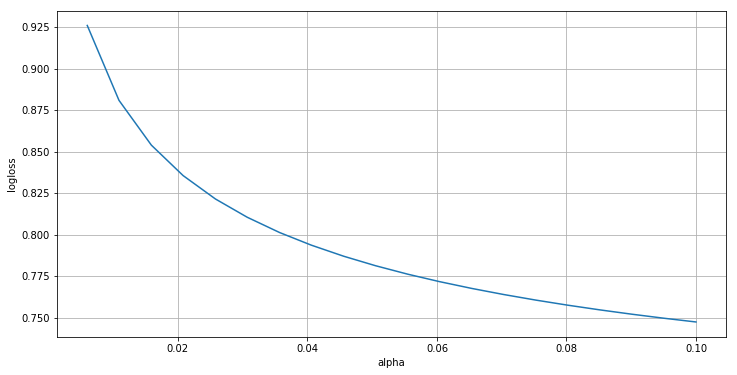

In [106]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1_train['alpha'], -results1_train['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [107]:
print('Best parameter: ', gridsearch1_train.best_params_)

Best parameter:  {'alpha': 0.1}


In [108]:
print('Best score: ', gridsearch1_train.best_score_)

Best score:  -0.747505704360766


### Tune Bernouli Naive Bayes Classifier

In [111]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [112]:
parameter_grid = [{'alpha':alpha_list2}]

In [113]:
# Gridsearch

# classifier object
classifier2 = BernoulliNB()

# DOES BERNOULLI HAVE EXACTLY THE SAME PARAMETERS AS MULTINOMIAL???

# TRAIN

# gridsearch object using 4-fold cross validation and neg_log_loss as scoring parameter
gridsearch2 = GridSearchCV(classifier2, parameter_grid, scoring='neg_log_loss', cv=4)  # , error_score=np.nan

'''THIS TOOK 10s of MINUTES EVEN ON P= .01'''

# fit the gridsearch
gridsearch2.fit(df_train[train_features], df_train[train_output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [114]:
# TEST

gridsearch2 = GridSearchCV(classifier2, parameter_grid, scoring='neg_log_loss', cv=4)  # , error_score=np.nan
gridsearch2.fit(df_test[test_features], df_test[test_output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [115]:
results2 = pd.DataFrame()

# collect alpha list ???
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data

# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

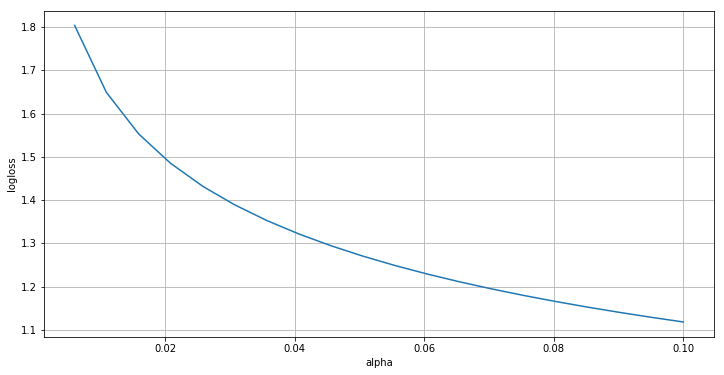

In [116]:
# Plot logloss vs alpha

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [117]:
print('Best parameter: ', gridsearch2.best_params_)

Best parameter:  {'alpha': 0.1}


In [118]:
print('Best score: ', gridsearch2.best_score_)

Best score:  -1.1181888346638764
